In [1]:
import pandas as pd


crime_data=pd.read_csv('/home/irteam/junghye-dcloud-dir/dscapstone/data_analysis/preprocessed_data/5_crimes_b_g.csv')
cctv_data=pd.read_csv('/home/irteam/junghye-dcloud-dir/dscapstone/data_analysis/preprocessed_data/cctv_region_by_year.csv')

# 전처리

In [2]:
# 계 drop
cctv_data=cctv_data.drop([0],axis=0,inplace=False)
cctv_data=cctv_data.drop(cctv_data.columns[[1,2]],axis=1,inplace=False)
cctv_data

,자치구,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,103,160,130,144,150,67,233,88,207,131
2,중 구,77,236,240,372,386,155,361,403,137,0
3,용산구,68,83,295,491,115,322,623,422,464,0
4,성동구,110,366,281,942,457,643,485,367,232,135
5,광진구,176,95,40,666,460,712,190,738,273,112
6,동대문구,5,72,774,702,201,218,229,229,317,9
7,중랑구,104,145,153,170,215,1074,976,507,294,NaN
8,성북구,229,322,594,811,867,714,253,407,338,104
9,강북구,16,68,210,4,375,963,569,298,797,NaN
10,도봉구,54,27,91,116,183,195,179,592,591,259


In [3]:
cctv_data=cctv_data.melt(id_vars=['자치구'],var_name='년도',value_name='cctv 설치 수')
cctv_data['년도']=cctv_data['년도'].str.replace('년','').astype(int)

cctv_data.head()

,자치구,년도,cctv 설치 수
0,종로구,2014,103
1,중 구,2014,77
2,용산구,2014,68
3,성동구,2014,110
4,광진구,2014,176


# Merge

In [4]:
cctv_crime_data=pd.merge(crime_data,cctv_data,on=['자치구','년도'])
# 검거율
cctv_crime_data['검거건수']=pd.to_numeric(cctv_crime_data['검거건수'],errors='coerce')
cctv_crime_data['발생건수']=pd.to_numeric(cctv_crime_data['발생건수'],errors='coerce')
cctv_crime_data['검거율']=cctv_crime_data['검거건수']/cctv_crime_data['발생건수']*100
cctv_crime_data

,년도,자치구,범죄유형,발생건수,검거건수,cctv 설치 수,검거율
0,2014,종로구,소계,5021.0,4610.0,103,91.814380
1,2014,종로구,살인,3.0,7.0,103,233.333333
2,2014,종로구,강도,12.0,15.0,103,125.000000
3,2014,종로구,강간·강제추행,226.0,948.0,103,419.469027
4,2014,종로구,절도,2272.0,1281.0,103,56.382042
...,...,...,...,...,...,...,...
1291,2022,강동구,살인,5.0,6.0,429,120.000000
1292,2022,강동구,강도,5.0,5.0,429,100.000000
1293,2022,강동구,강간·강제추행,157.0,134.0,429,85.350318
1294,2022,강동구,절도,1672.0,900.0,429,53.827751


In [5]:
cctv_crime_data['cctv 설치 수']=pd.to_numeric(cctv_crime_data['cctv 설치 수'],errors='coerce')
cctv_crime_data['cctv 범주']=pd.qcut(cctv_crime_data['cctv 설치 수'],q=3,labels=['낮음','중간','높음'],duplicates='drop')
cctv_crime_data.head()

,년도,자치구,범죄유형,발생건수,검거건수,cctv 설치 수,검거율,cctv 범주
0,2014,종로구,소계,5021.0,4610.0,103.0,91.814380,낮음
1,2014,종로구,살인,3.0,7.0,103.0,233.333333,낮음
2,2014,종로구,강도,12.0,15.0,103.0,125.000000,낮음
3,2014,종로구,강간·강제추행,226.0,948.0,103.0,419.469027,낮음
4,2014,종로구,절도,2272.0,1281.0,103.0,56.382042,낮음


# 데이터 분석

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

NanumBarunGothic
NanumBarunGothic
NanumBarunGothic
NanumBarunGothic


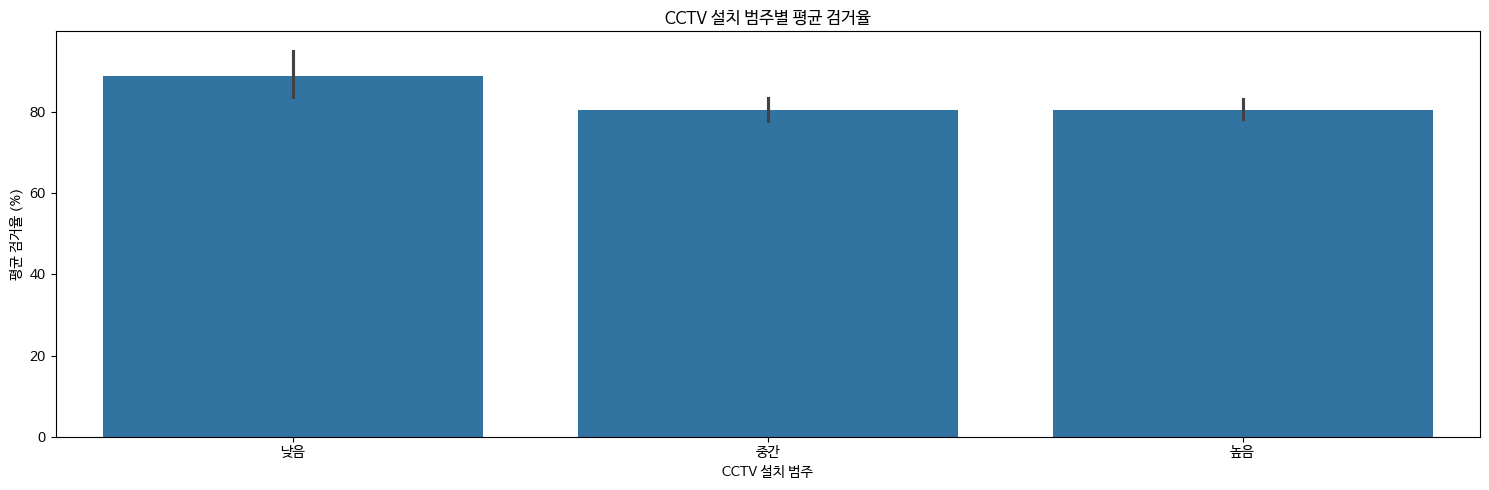

In [7]:
# 시각화
import matplotlib.font_manager as fm

# 사용 가능한 폰트 목록을 가져와서 'NanumBarunGothic'이 있는지 확인
for font in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in font.name:
        print(font.name)

# 'NanumBarunGothic' 폰트를 사용하기 위한 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(15, 5))

sns.barplot(data=cctv_crime_data,x='cctv 범주',y='검거율',estimator=np.mean)
plt.title('CCTV 설치 범주별 평균 검거율')
plt.xlabel('CCTV 설치 범주')
plt.ylabel('평균 검거율 (%)')

plt.tight_layout()
plt.show()

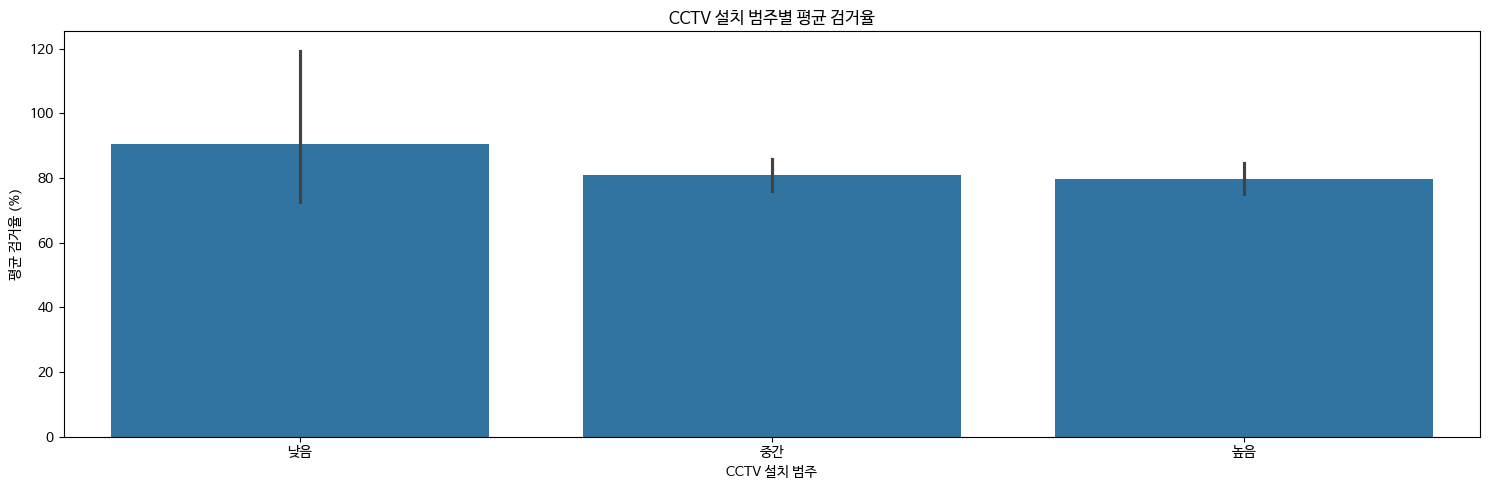

In [8]:
# 2022 데이터에 대해서만

data_2022=cctv_crime_data[cctv_crime_data['년도']==2022]

# 시각화
plt.figure(figsize=(15, 5))

sns.barplot(data=data_2022,x='cctv 범주',y='검거율',estimator=np.mean)
plt.title('CCTV 설치 범주별 평균 검거율')
plt.xlabel('CCTV 설치 범주')
plt.ylabel('평균 검거율 (%)')

plt.tight_layout()
plt.show()

cctv 설치 개수를 늘린다고 검거율이 낮아지진 않다 
-> cctv 설치 개수를 늘리기보다는 스마트 cctv 개발을 통해 효과적인 범죄 탐지 및 검거를 기대하고자 함

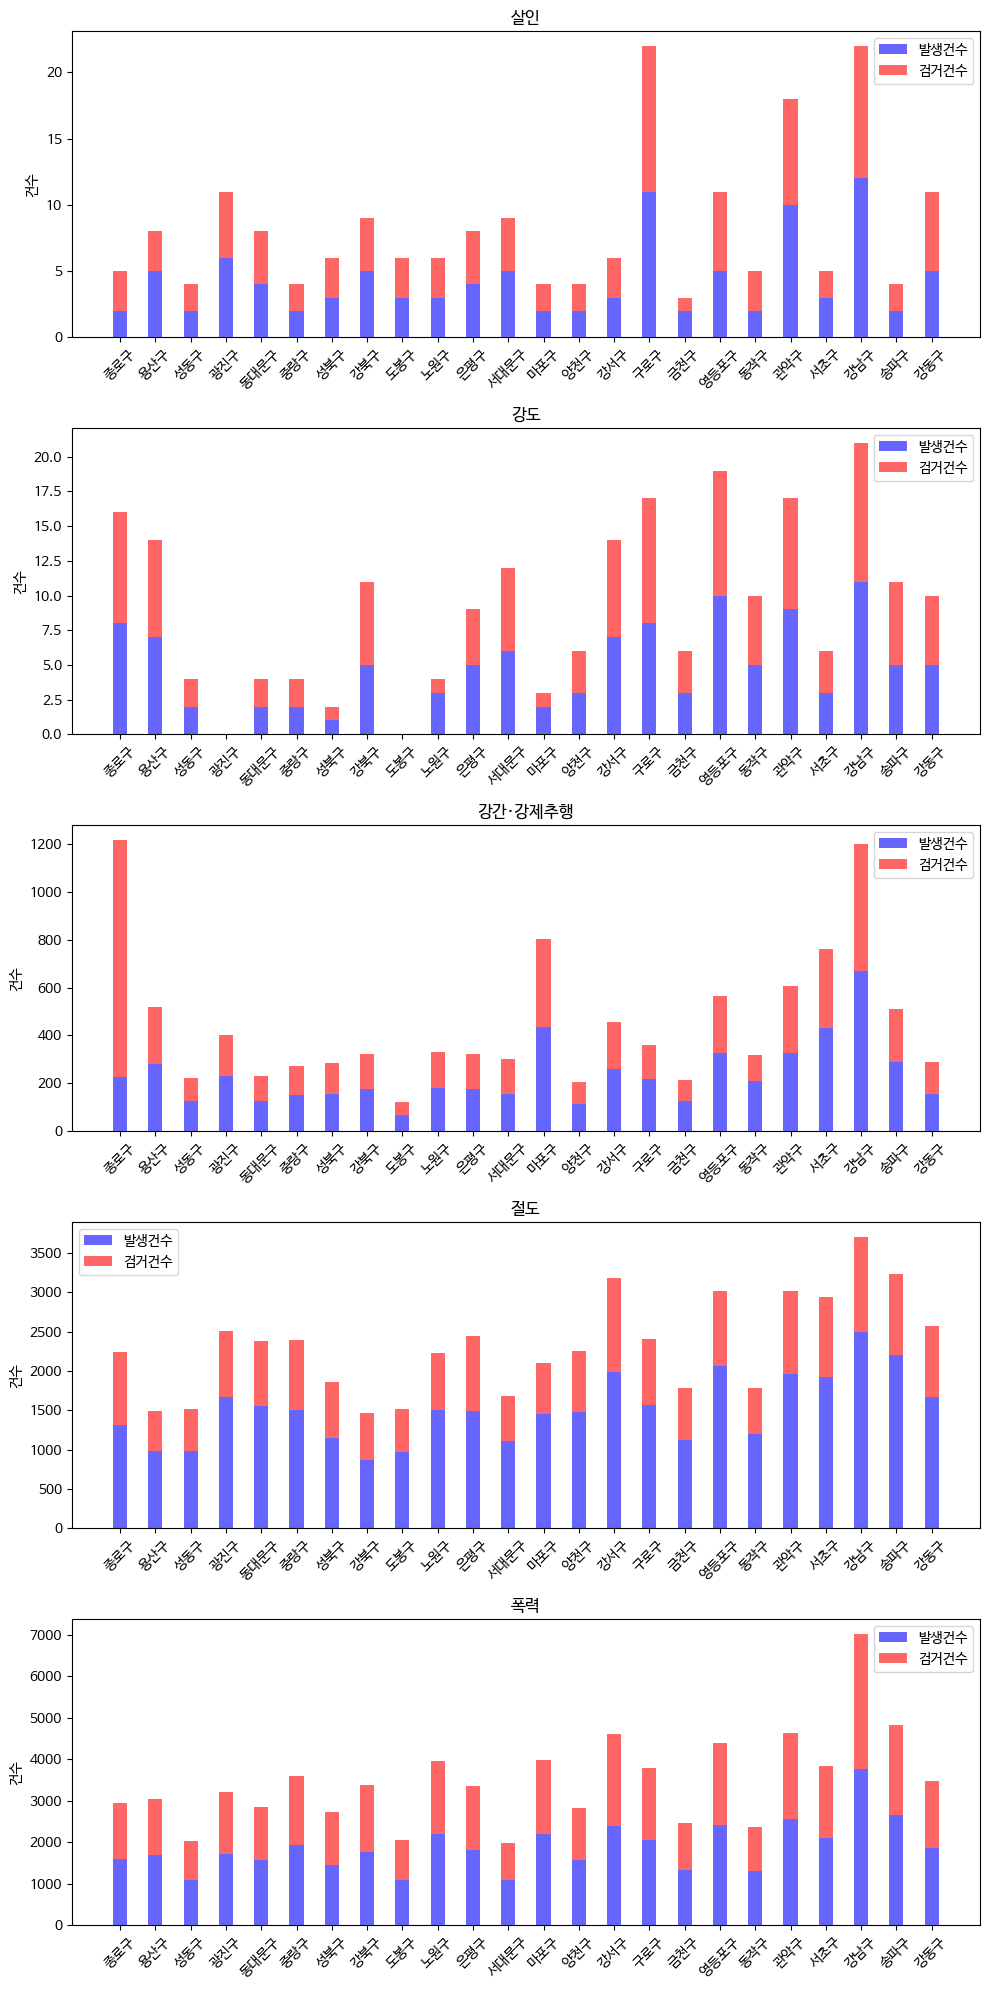

In [9]:
# 1. 구별 5대 범죄 발생 현황

# 범죄 유형별로 서브플롯 생성
fig, axes=plt.subplots(5,1,figsize=(10,20))


crime_types=data_2022['범죄유형'].unique()
crime_types=np.delete(crime_types,np.where(crime_types=='소계'))

unique_districts=data_2022['자치구'].unique()
width=0.4


for i, crime_type in enumerate(crime_types):
    subset=data_2022[data_2022['범죄유형']==crime_type]
    
    for j, district in enumerate(unique_districts):
        district_data=subset[subset['자치구']==district]
        
        axes[i].bar(j,district_data['발생건수'],width,label='발생건수' if j==0 else "",color='b',alpha=0.6)
        axes[i].bar(j, district_data['검거건수'], width,label='검거건수' if j == 0 else "", color='r', alpha=0.6, bottom=district_data['발생건수'])
        
        axes[i].set_title(f'{crime_type}')
        axes[i].legend()
        axes[i].set_xticks(np.arange(len(unique_districts)))
        axes[i].set_xticklabels(unique_districts, rotation=45)
        axes[i].set_ylabel('건수')
        
        
plt.tight_layout()
plt.show()

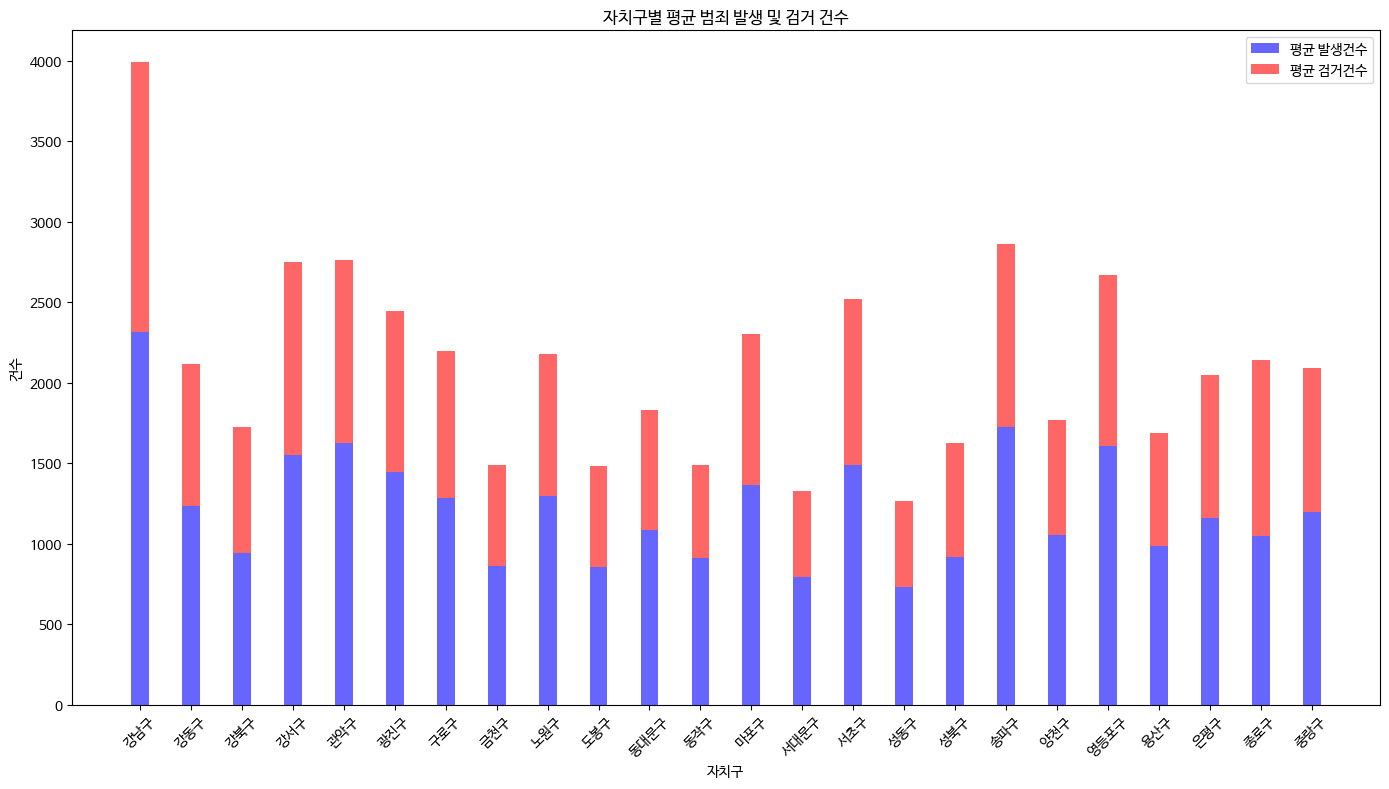

In [10]:
# 구별 평균 범죄 발생 및 검거 건수

grouped=data_2022.groupby('자치구').agg({'발생건수':'mean','검거건수':'mean'}).reset_index()

ind=np.arange(len(grouped))

width=0.35

plt.figure(figsize=(14,8))
bars=plt.bar(ind,grouped['발생건수'],width,label='평균 발생건수',color='b',alpha=0.6)
bars2 = plt.bar(ind, grouped['검거건수'], width, label='평균 검거건수', color='r', alpha=0.6, bottom=grouped['발생건수'])

# 라벨, 타이틀 및 범례 추가
plt.xlabel('자치구')
plt.ylabel('건수')
plt.title('자치구별 평균 범죄 발생 및 검거 건수')
plt.xticks(ind, grouped['자치구'], rotation=45)
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

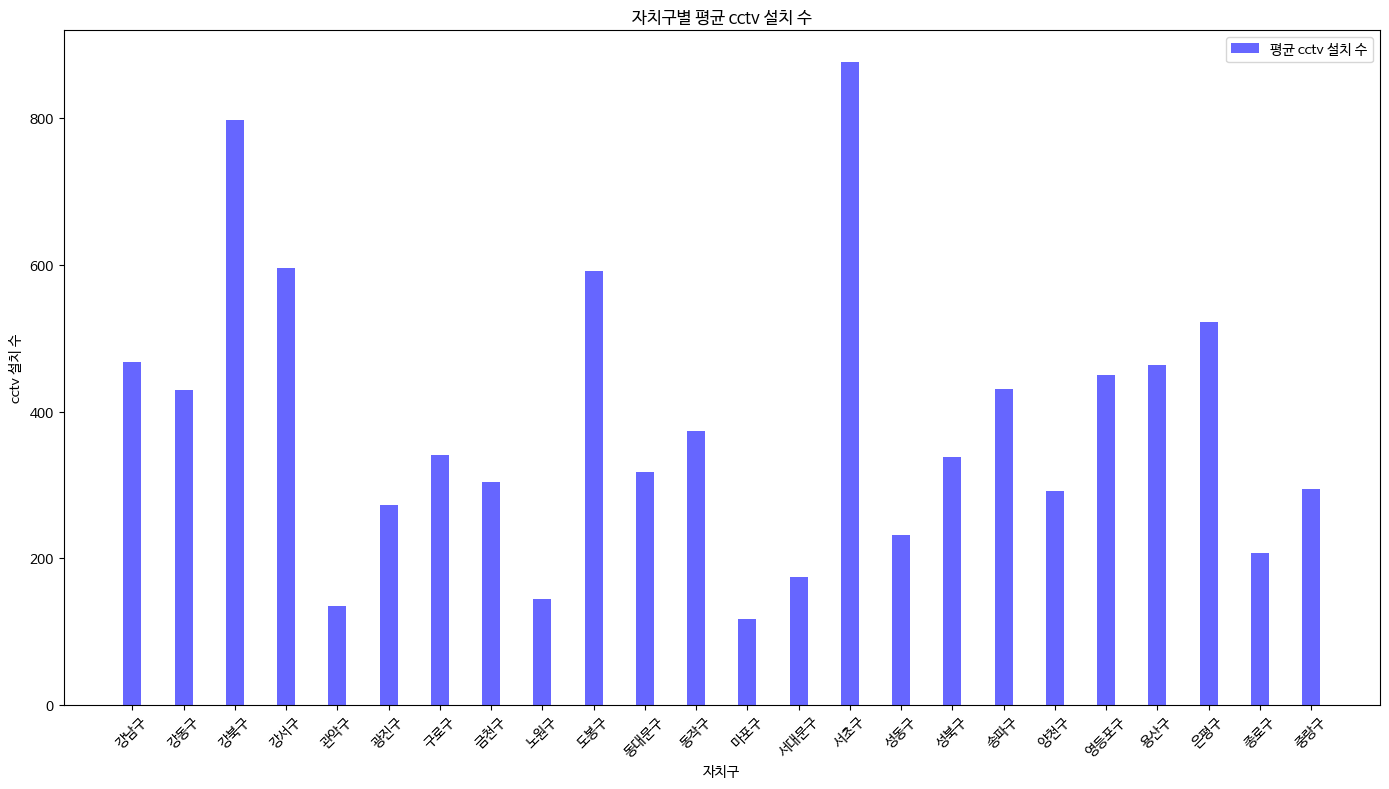

In [11]:
# 구별 cctv 설치 수

grouped=data_2022.groupby('자치구').agg({'cctv 설치 수':'mean'}).reset_index()

ind=np.arange(len(grouped))

width=0.35

plt.figure(figsize=(14,8))
bars=plt.bar(ind,grouped['cctv 설치 수'],width,label='평균 cctv 설치 수',color='b',alpha=0.6)

# 라벨, 타이틀 및 범례 추가
plt.xlabel('자치구')
plt.ylabel('cctv 설치 수')
plt.title('자치구별 평균 cctv 설치 수')
plt.xticks(ind, grouped['자치구'], rotation=45)
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

In [12]:
# 범죄 발생 장소 top5

place_data=pd.read_csv('/home/irteam/junghye-dcloud-dir/dscapstone/data_analysis/preprocessed_data/5_by_place.csv')

place_data


,년도,장소,범죄유형,건수
0,2014,아파트 연립다세대,소계,130674
1,2014,단독주택,소계,5671
2,2014,노상,소계,7325
3,2014,상점,소계,39067
4,2014,숙박업소 목욕탕,소계,5068
...,...,...,...,...
625,2022,유원지,절도,1007
626,2022,학교,절도,487
627,2022,금융기관,절도,189
628,2022,기타,절도,578


In [13]:
placedata_2022=place_data[place_data['년도']==2022]
placedata_2022


,년도,장소,범죄유형,건수
112,2022,아파트 연립다세대,소계,90399
113,2022,단독주택,소계,9781
114,2022,노상,소계,7906
115,2022,상점,소계,29320
116,2022,숙박업소 목욕탕,소계,10556
...,...,...,...,...
625,2022,유원지,절도,1007
626,2022,학교,절도,487
627,2022,금융기관,절도,189
628,2022,기타,절도,578


/tmp/ipykernel_525334/2517828083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placedata_2022_filtered['건수']=pd.to_numeric(placedata_2022_filtered['건수'],errors='coerce')


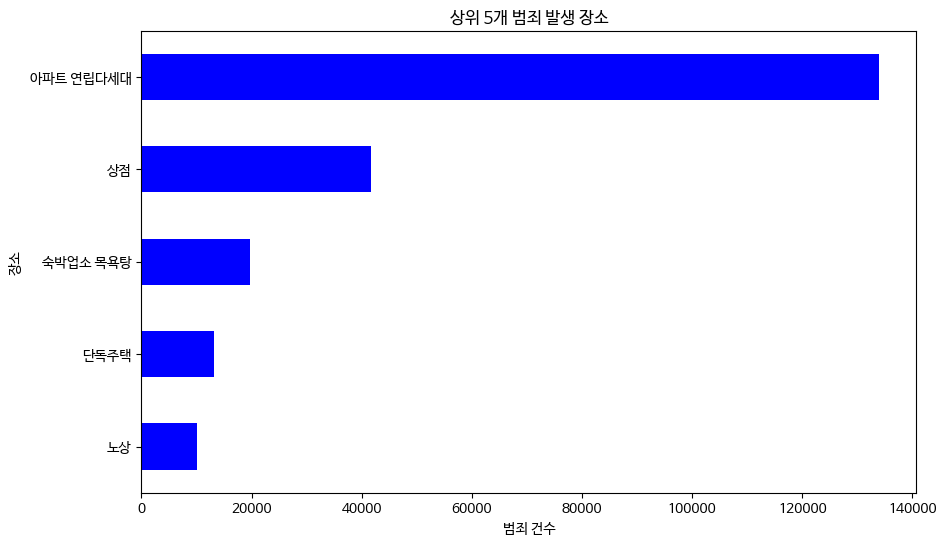

In [14]:
placedata_2022_filtered = placedata_2022[placedata_2022['장소'] != '소계']

placedata_2022_filtered['건수']=pd.to_numeric(placedata_2022_filtered['건수'],errors='coerce')
top_places_overall=placedata_2022_filtered.groupby('장소')['건수'].sum().nlargest(5).sort_values(ascending=False)


plt.figure(figsize=(10,6))

top_places_overall.plot(kind='barh',color='blue')

plt.xlabel('범죄 건수')
plt.title('상위 5개 범죄 발생 장소')
plt.gca().invert_yaxis()

plt.show()

In [15]:
data_2022

,년도,자치구,범죄유형,발생건수,검거건수,cctv 설치 수,검거율,cctv 범주
1152,2022,종로구,소계,3138.0,3284.0,207.0,104.652645,낮음
1153,2022,종로구,살인,2.0,3.0,207.0,150.000000,낮음
1154,2022,종로구,강도,8.0,8.0,207.0,100.000000,낮음
1155,2022,종로구,강간·강제추행,228.0,988.0,207.0,433.333333,낮음
1156,2022,종로구,절도,1313.0,932.0,207.0,70.982483,낮음
...,...,...,...,...,...,...,...,...
1291,2022,강동구,살인,5.0,6.0,429.0,120.000000,중간
1292,2022,강동구,강도,5.0,5.0,429.0,100.000000,중간
1293,2022,강동구,강간·강제추행,157.0,134.0,429.0,85.350318,중간
1294,2022,강동구,절도,1672.0,900.0,429.0,53.827751,중간


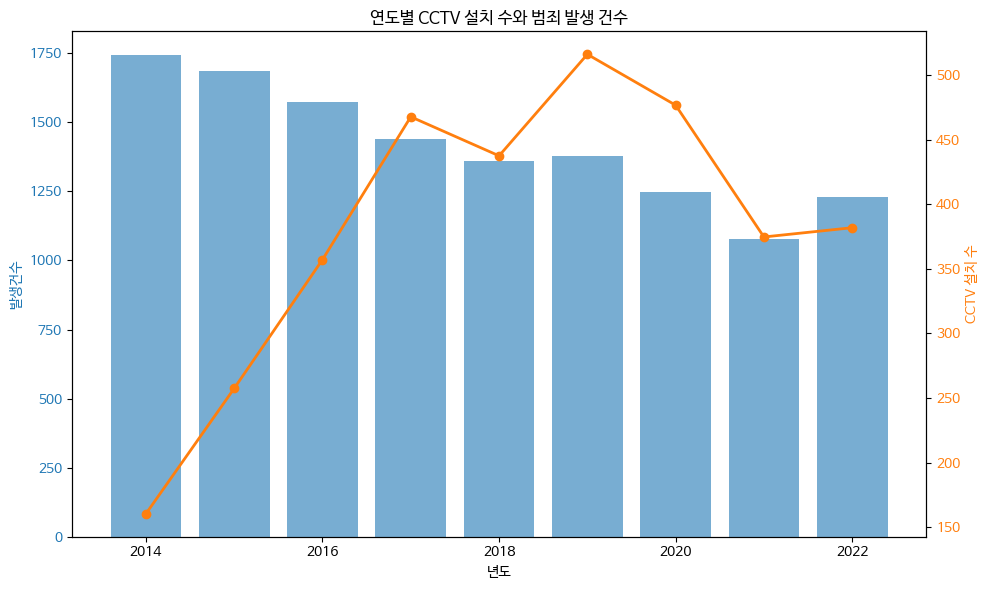

In [16]:
cctv_crime_data_by_year=cctv_crime_data.groupby('년도').agg({'발생건수':'mean','cctv 설치 수':'mean'}).reset_index()

cctv_crime_data_by_year.set_index('년도',inplace=True)

fig,ax1=plt.subplots(figsize=(10,6))

color='tab:blue'
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수',color=color)

ax1.bar(cctv_crime_data_by_year.index,cctv_crime_data_by_year['발생건수'],color=color,alpha=0.6)
ax1.tick_params(axis='y',labelcolor=color)

# 라인 그래프(cctv 설치 수)
ax2=ax1.twinx()
color='tab:orange'
ax2.set_ylabel('CCTV 설치 수',color=color)
ax2.plot(cctv_crime_data_by_year.index,cctv_crime_data_by_year['cctv 설치 수'],color=color,marker='o', linewidth=2)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('연도별 CCTV 설치 수와 범죄 발생 건수')

fig.tight_layout()
plt.show()

In [17]:
from statsmodels.formula.api import ols

y_mod = ols("발생건수 ~ Q('cctv 설치 수')", data=cctv_crime_data_by_year)

y_mod.fit().params

Intercept         1894.988804
Q('cctv 설치 수')      -1.258820
dtype: float64

cctv 설치 개수가 0일 때 연간 예상 범죄 발생 수는 약 1895건으로 예상됨
cctv 설치 수가 1만큼 증가할 때마다 발생 건수는 평균적으로 약 -1.26만큼 감소할 것으로 예상됨
coefficient(변수의 계수)가 음수인 걸로 보았을 때, 'cctv 설치 수'와 '발생 건수' 사이에는 음의 상관관계가 있으며, 이는 cctv가 많이 설치될 수록 발생 건수가 감소하는 경향이 있음을 시사함.

In [18]:
sim1=cctv_crime_data_by_year[['발생건수','cctv 설치 수']]

grid = pd.DataFrame({"cctv 설치 수": np.linspace(sim1['cctv 설치 수'].min(), 
                                                  sim1['cctv 설치 수'].max(), 10)})

grid

,cctv 설치 수
0,160.416667
1,199.940419
2,239.464171
3,278.987923
4,318.511675
5,358.035427
6,397.559179
7,437.082931
8,476.606683
9,516.130435


In [19]:
sim1

,발생건수,cctv 설치 수
년도,,
2014,1742.263889,160.416667
2015,1686.763889,257.500000
2016,1572.986111,357.166667
2017,1439.597222,467.750000
2018,1359.972222,437.541667
2019,1379.736111,516.130435
2020,1248.503497,476.750000
2021,1077.555556,374.708333
2022,1229.971831,381.875000


In [20]:
y_mod2=ols("발생건수 ~ Q('cctv 설치 수')", data=sim1).fit()

grid['pred']=y_mod2.predict(grid)

grid

,cctv 설치 수,pred
0,160.416667,1693.053130
1,199.940419,1643.299849
2,239.464171,1593.546568
3,278.987923,1543.793287
4,318.511675,1494.040005
5,358.035427,1444.286724
6,397.559179,1394.533443
7,437.082931,1344.780162
8,476.606683,1295.026881
9,516.130435,1245.273600


In [21]:
import seaborn as sns
import seaborn.objects as so

# prediction 시각화 

/home/irteam/anaconda3/envs/pixt/lib/python3.10/site-packages/seaborn/_core/plot.py:1045: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi, format="png", bbox_inches="tight")
/home/irteam/anaconda3/envs/pixt/lib/python3.10/site-packages/seaborn/_core/plot.py:1045: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi, format="png", bbox_inches="tight")
/home/irteam/anaconda3/envs/pixt/lib/python3.10/site-packages/seaborn/_core/plot.py:1045: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi, format="png", bbox_inches="tight")
/home/irteam/anaconda3/envs/pixt/lib/python3.10/site-packages/seaborn/_core/plot.py:1045: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi, format="png", bbox_inches="tight")
/home/irteam/anaconda3/envs/p

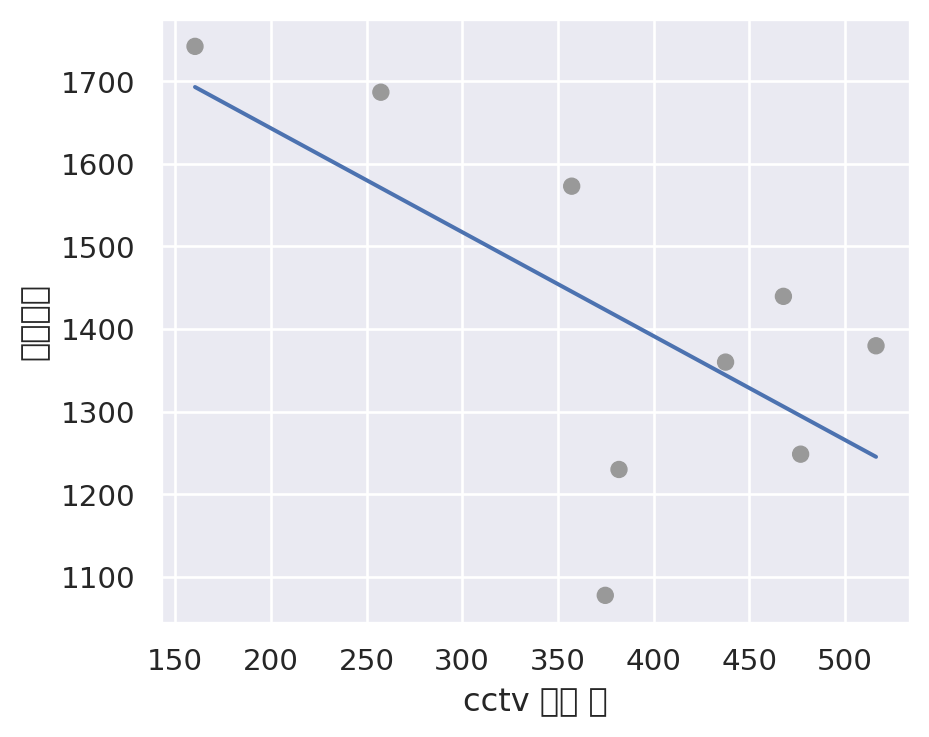

In [22]:
from matplotlib import font_manager, rc

# 사용할 폰트의 경로를 지정합니다.
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf"

# 폰트 프로퍼티를 설정합니다.
font_prop = font_manager.FontProperties(fname=font_path)

# 전역 폰트 설정을 변경합니다.
rc('font', family=font_prop.get_name())

(
    so.Plot(sim1,x='cctv 설치 수',y='발생건수')
    .add(so.Dot(color=".6"))
    .add(so.Line(),x=grid['cctv 설치 수'],y=grid['pred'])
    .layout(size=(5,4))
)

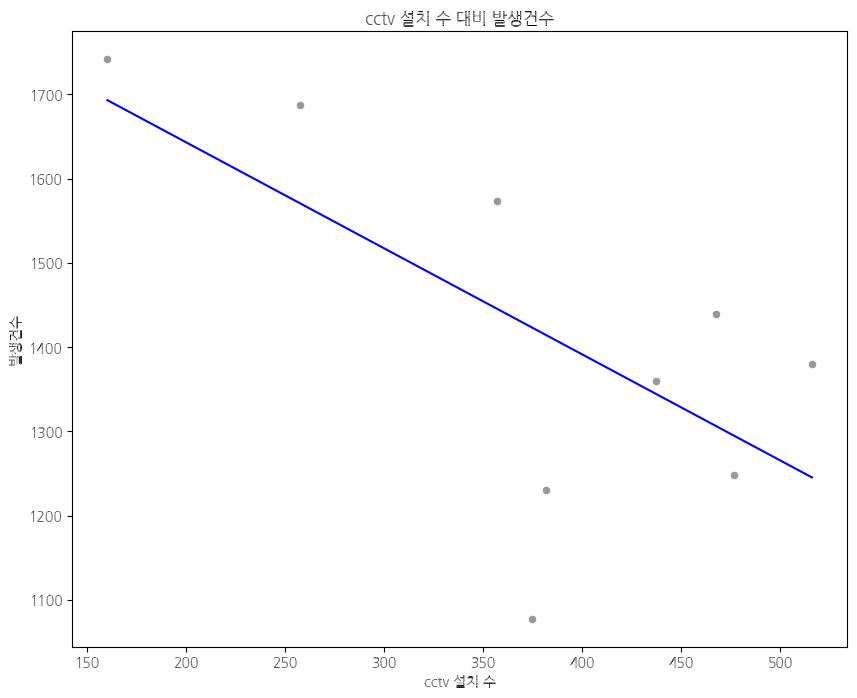

In [23]:
# 실제 값에 대한 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sim1, x='cctv 설치 수', y='발생건수', color=".6")

# 예측 선 그리기
sns.lineplot(data=grid, x='cctv 설치 수', y='pred', color="blue")

# x, y 라벨 및 타이틀 설정
plt.xlabel('cctv 설치 수')
plt.ylabel('발생건수')
plt.title('cctv 설치 수 대비 발생건수')

# 그래프 표시
plt.show()

In [24]:
from statsmodels.tools.eval_measures import rmse,meanabs

y=sim1['발생건수']

y_hat=2**y_mod2.fittedvalues
R2=y_mod2.rsquared

print(
    f"R-squared : {R2:.2f}, RMSE: {rmse(y,y_hat):.2f}, "
    f"MAE:{meanabs(y,y_hat):.2f}"
)

R-squared : 0.42, RMSE: inf, MAE:inf


In [25]:
summary=y_mod2.summary()
summary.tables[1]

/home/irteam/anaconda3/envs/pixt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1894.9888,220.921,8.578,0.000,1372.594,2417.384
Q('cctv 설치 수'),-1.2588,0.558,-2.255,0.059,-2.579,0.061


# 유동인구

In [29]:
people_data=pd.read_csv('/home/irteam/junghye-dcloud-dir/dscapstone/data_analysis/data/LOCAL_PEOPLE_GU_2022.csv',encoding='cp949')

people_data.head()

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,11110,198013.1166,4873.9724,2875.5716,4721.0371,8056.7447,8409.5262,7030.9611,...,8358.8772,6598.3393,7714.6240,6930.9907,8622.9096,7542.4183,8012.8912,6618.1705,5234.3484,14670.1388
1,20220101,0,11140,163439.6365,4588.8045,1754.1373,2565.4546,5964.4053,7538.1455,7272.5991,...,8907.1659,7146.4494,7837.6613,6241.1243,6190.8188,5122.5866,5497.6735,4887.9068,3580.1862,9786.9251
2,20220101,0,11170,252165.9659,7338.0378,3621.6062,5679.3041,8010.4273,10246.1419,11344.5582,...,11230.4114,11730.1838,13262.1450,10157.6281,10607.3606,9141.2146,8998.7112,8093.6815,5922.3439,15970.6930
3,20220101,0,11200,312343.4234,11468.7636,4805.9768,6325.7793,10097.0347,12308.5453,12072.8752,...,12258.5309,12985.5190,15908.0426,12635.4614,12772.6410,11329.8455,12209.6659,10498.3080,7920.3737,20142.3144
4,20220101,0,11215,348524.3239,10212.5621,5475.5993,8713.1763,12957.8151,16604.5445,14338.6849,...,17011.8494,14646.3396,15249.4805,13215.0753,14246.1921,12944.7686,14256.4084,11730.0618,8646.9569,19500.4808


In [36]:
people_data.shape

(219000, 32)

In [27]:
region_code=pd.read_excel('/home/irteam/junghye-dcloud-dir/dscapstone/data_analysis/data/행정동코드_매핑정보_20200325.xlsx',sheet_name='유입지코드')

In [28]:
region_code=region_code[region_code['RESD_DO_NM']=='서울']
region_code

,RESD_CD,RESD_DO_NM,RESC_CT_NM,Unnamed: 3,Unnamed: 4
0,11110,서울,종로구,NaN,NaN
1,11140,서울,중구,NaN,NaN
2,11170,서울,용산구,NaN,NaN
3,11200,서울,성동구,NaN,NaN
4,11215,서울,광진구,NaN,NaN
5,11230,서울,동대문구,NaN,NaN
6,11260,서울,중랑구,NaN,NaN
7,11290,서울,성북구,NaN,NaN
8,11305,서울,강북구,NaN,NaN
9,11320,서울,도봉구,NaN,NaN


In [33]:
region_code=region_code.rename(columns={'RESD_CD':'자치구코드'},inplace=False)
region_code

,자치구코드,RESD_DO_NM,RESC_CT_NM,Unnamed: 3,Unnamed: 4
0,11110,서울,종로구,NaN,NaN
1,11140,서울,중구,NaN,NaN
2,11170,서울,용산구,NaN,NaN
3,11200,서울,성동구,NaN,NaN
4,11215,서울,광진구,NaN,NaN
5,11230,서울,동대문구,NaN,NaN
6,11260,서울,중랑구,NaN,NaN
7,11290,서울,성북구,NaN,NaN
8,11305,서울,강북구,NaN,NaN
9,11320,서울,도봉구,NaN,NaN


In [39]:
people_merged_df=pd.merge(people_data,region_code,on='자치구코드',how='inner')
people_merged_df

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,RESD_DO_NM,RESC_CT_NM,Unnamed: 3,Unnamed: 4
0,20220101,0,11110,198013.1166,4873.9724,2875.5716,4721.0371,8056.7447,8409.5262,7030.9611,...,8622.9096,7542.4183,8012.8912,6618.1705,5234.3484,14670.1388,서울,종로구,NaN,NaN
1,20220101,1,11110,195576.0080,4741.5218,2818.4208,4659.8790,8030.4452,8265.4866,6878.6441,...,8575.9529,7468.2108,7884.1691,6507.2541,5179.3141,14560.8249,서울,종로구,NaN,NaN
2,20220101,2,11110,194854.1740,4795.4584,2843.2060,4660.1581,7963.4070,8279.0991,6818.2681,...,8520.0177,7460.2574,7916.7226,6517.6150,5149.3254,14556.2429,서울,종로구,NaN,NaN
3,20220101,3,11110,194612.3125,4779.8778,2833.7372,4701.1193,7938.3260,8282.0767,6817.6358,...,8528.6151,7440.4579,7907.0094,6544.1499,5167.4661,14583.5975,서울,종로구,NaN,NaN
4,20220101,4,11110,194345.6097,4753.4636,2830.2711,4599.2775,7984.3329,8234.8212,6749.7028,...,8464.1684,7420.1163,7879.5214,6538.3102,5155.7122,14542.5538,서울,종로구,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218995,20221231,19,11740,495518.4903,20055.0019,11342.5474,14093.1282,12133.4484,14558.5988,15417.0574,...,21463.8607,18447.1016,20268.2639,18960.4656,15151.1660,35696.2209,서울,강동구,NaN,NaN
218996,20221231,20,11740,500961.9211,20124.8521,11397.6765,14183.5851,12285.0155,14657.9295,15678.9583,...,21772.2408,18758.6045,20603.7876,19085.5982,15273.1754,35785.6116,서울,강동구,NaN,NaN
218997,20221231,21,11740,506973.6962,20301.8894,11527.1939,14194.5456,12337.4796,14896.3901,16021.5099,...,21983.6646,18915.1215,20872.8414,19267.1204,15371.3871,35853.7091,서울,강동구,NaN,NaN
218998,20221231,22,11740,513082.1424,20575.2582,11680.7128,14314.5503,12589.8316,15163.5496,16313.2911,...,22470.1934,19140.9948,21049.1490,19256.9484,15427.1046,36129.5123,서울,강동구,NaN,NaN


In [44]:
people_merged_df.drop(['Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [47]:
people_merged_df.rename(columns={'RESC_CT_NM':'자치구'},inplace=True)

In [58]:
people_merged_filtered_df=people_merged_df[['기준일ID','시간대구분','자치구','총생활인구수']]
people_merged_filtered_df=people_merged_filtered_df.groupby('자치구')['총생활인구수'].mean().reset_index()

In [63]:
merged_df=pd.merge(people_merged_filtered_df,data_2022,left_on='자치구',right_on='자치구',how='inner')

merged_df # 각 자치구별 범죄유별 발생건수

,자치구,총생활인구수,년도,범죄유형,발생건수,검거건수,cctv 설치 수,검거율,cctv 범주
0,강남구,804282.957775,2022,소계,6947.0,5020.0,468.0,72.261408,높음
1,강남구,804282.957775,2022,살인,12.0,10.0,468.0,83.333333,높음
2,강남구,804282.957775,2022,강도,11.0,10.0,468.0,90.909091,높음
3,강남구,804282.957775,2022,강간·강제추행,667.0,534.0,468.0,80.059970,높음
4,강남구,804282.957775,2022,절도,2495.0,1207.0,468.0,48.376754,높음
...,...,...,...,...,...,...,...,...,...
139,중랑구,348109.313828,2022,살인,2.0,2.0,294.0,100.000000,중간
140,중랑구,348109.313828,2022,강도,2.0,2.0,294.0,100.000000,중간
141,중랑구,348109.313828,2022,강간·강제추행,150.0,121.0,294.0,80.666667,중간
142,중랑구,348109.313828,2022,절도,1508.0,882.0,294.0,58.488064,중간


In [65]:
crime_totals = merged_df.groupby('자치구')['발생건수'].sum().reset_index(name='총발생건수')

crime_totals

,자치구,총발생건수
0,강남구,13894.0
1,강동구,7422.0
2,강북구,5664.0
3,강서구,9326.0
4,관악구,9758.0
5,광진구,7238.0
6,구로구,7714.0
7,금천구,5154.0
8,노원구,7792.0
9,도봉구,4282.0


In [71]:
merged_df_filtered=merged_df[['자치구','총생활인구수']]
merged_df_filtered

,자치구,총생활인구수
0,강남구,804282.957775
1,강남구,804282.957775
2,강남구,804282.957775
3,강남구,804282.957775
4,강남구,804282.957775
...,...,...
139,중랑구,348109.313828
140,중랑구,348109.313828
141,중랑구,348109.313828
142,중랑구,348109.313828


In [77]:
crime_rate=pd.merge(crime_totals,merged_df,on='자치구')

crime_rate['범죄발생률']=crime_rate['총발생건수']/crime_rate['총생활인구수']

# 범죄 취약 지역 선별 기준 설정 (예: 범죄발생률 상위 25%)
vulnerable_districts_threshold = crime_rate['범죄발생률'].quantile(0.75)
vulnerable_districts = crime_rate[crime_rate['범죄발생률'] > vulnerable_districts_threshold]


In [78]:
vulnerable_districts

,자치구,총발생건수,총생활인구수,년도,범죄유형,발생건수,검거건수,cctv 설치 수,검거율,cctv 범주,범죄발생률
24,관악구,9758.0,465291.644803,2022,소계,4879.0,3411.0,135.0,69.911867,낮음,0.020972
25,관악구,9758.0,465291.644803,2022,살인,10.0,8.0,135.0,80.000000,낮음,0.020972
26,관악구,9758.0,465291.644803,2022,강도,9.0,8.0,135.0,88.888889,낮음,0.020972
27,관악구,9758.0,465291.644803,2022,강간·강제추행,327.0,279.0,135.0,85.321101,낮음,0.020972
28,관악구,9758.0,465291.644803,2022,절도,1966.0,1050.0,135.0,53.407935,낮음,0.020972
29,관악구,9758.0,465291.644803,2022,폭력,2567.0,2066.0,135.0,80.483054,낮음,0.020972
42,금천구,5154.0,218324.523956,2022,소계,2577.0,1887.0,304.0,73.224680,중간,0.023607
43,금천구,5154.0,218324.523956,2022,살인,2.0,1.0,304.0,50.000000,중간,0.023607
44,금천구,5154.0,218324.523956,2022,강도,3.0,3.0,304.0,100.000000,중간,0.023607
45,금천구,5154.0,218324.523956,2022,강간·강제추행,127.0,87.0,304.0,68.503937,중간,0.023607


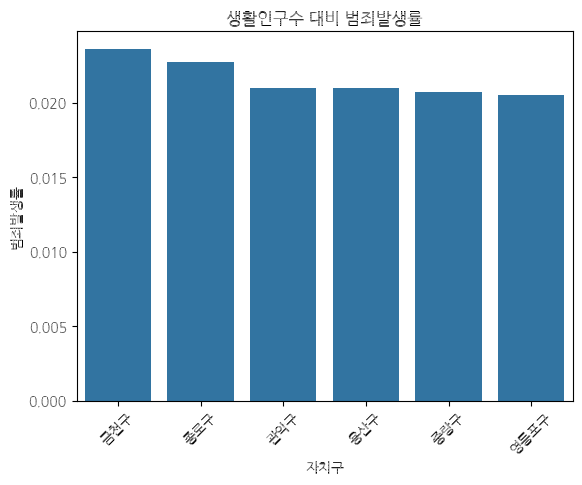

In [79]:
# 시각화 코드 (범죄 취약 지역의 범죄 발생률을 나타내는 막대 그래프)
sns.barplot(x='자치구', y='범죄발생률', data=vulnerable_districts.sort_values('범죄발생률', ascending=False))
plt.title('생활인구수 대비 범죄발생률')
plt.xticks(rotation=45)
plt.show()

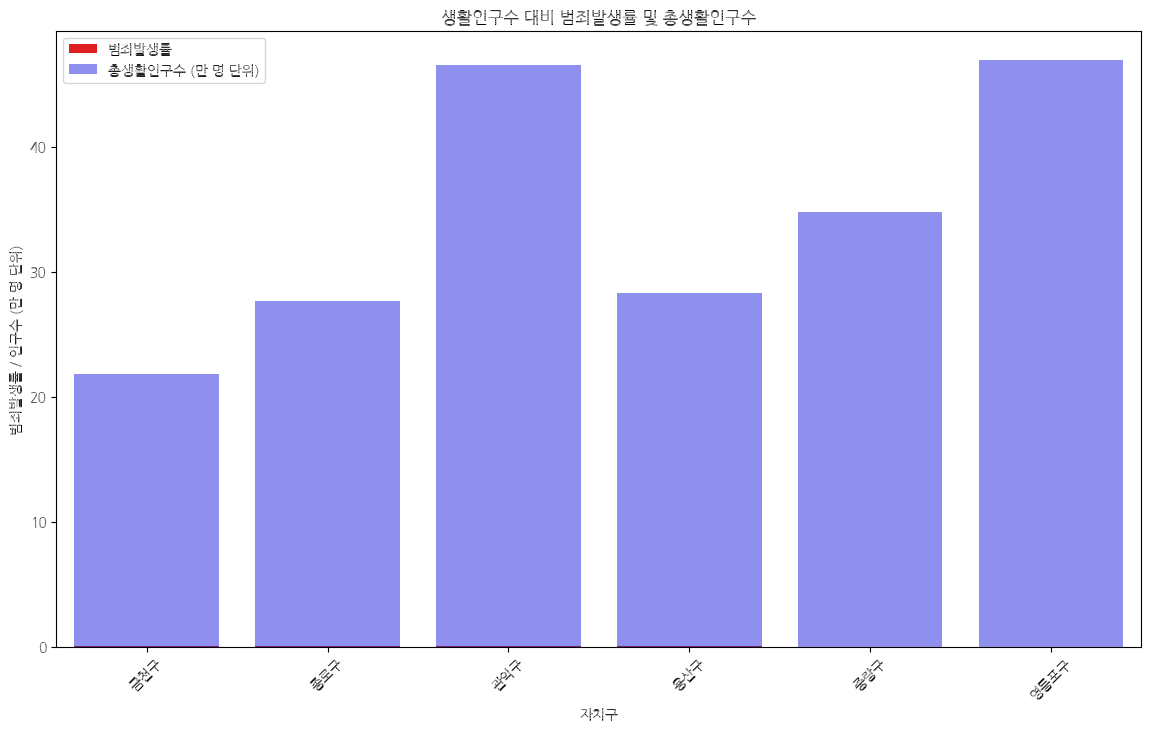

In [83]:
vulnerable_districts_sorted=vulnerable_districts.sort_values('범죄발생률',ascending=False)

plt.figure(figsize=(14,8))

sns.barplot(x='자치구',y='범죄발생률',data=vulnerable_districts_sorted,color='red',label='범죄발생률')

vulnerable_districts_sorted['scaled_population'] = vulnerable_districts_sorted['총생활인구수'] / 10000
sns.barplot(x='자치구', y='scaled_population', data=vulnerable_districts_sorted, color='blue', alpha=0.5, label='총생활인구수 (만 명 단위)')


# 범례 표시
plt.legend()

# 그래프 제목 및 축 라벨 설정
plt.title('생활인구수 대비 범죄발생률 및 총생활인구수')
plt.xlabel('자치구')
plt.ylabel('범죄발생률 / 인구수 (만 명 단위)')

# x축 레이블의 글자를 회전하여 겹치지 않게 합니다.
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  범죄발생률   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.018
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.315
Time:                        08:43:24   Log-Likelihood:                 630.17
No. Observations:                 144   AIC:                            -1256.
Df Residuals:                     142   BIC:                            -1250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0182      0.001     31.

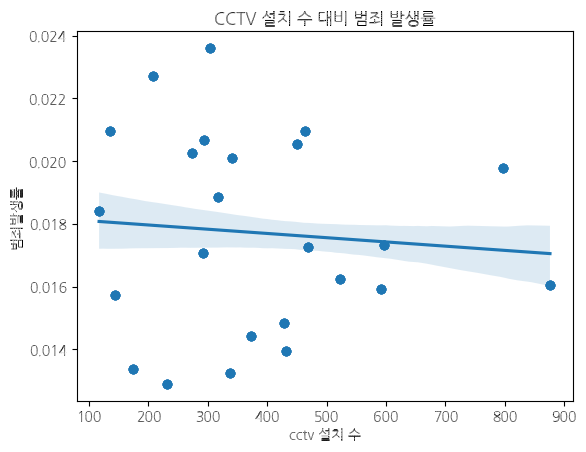

In [81]:
# 선형 회귀 모델로 인구 대비 범죄 발생률과 CCTV 설치 수 관계 탐색
model = ols('범죄발생률 ~ Q("cctv 설치 수")', data=crime_rate).fit()
print(model.summary())

# 선형 회귀 결과 시각화
sns.regplot(x='cctv 설치 수', y='범죄발생률', data=crime_rate)
plt.title('CCTV 설치 수 대비 범죄 발생률')
plt.show()